In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.to_csv('titanic.csv',index=0)

In [4]:
tdf = pd.read_csv('titanic.csv')
tdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


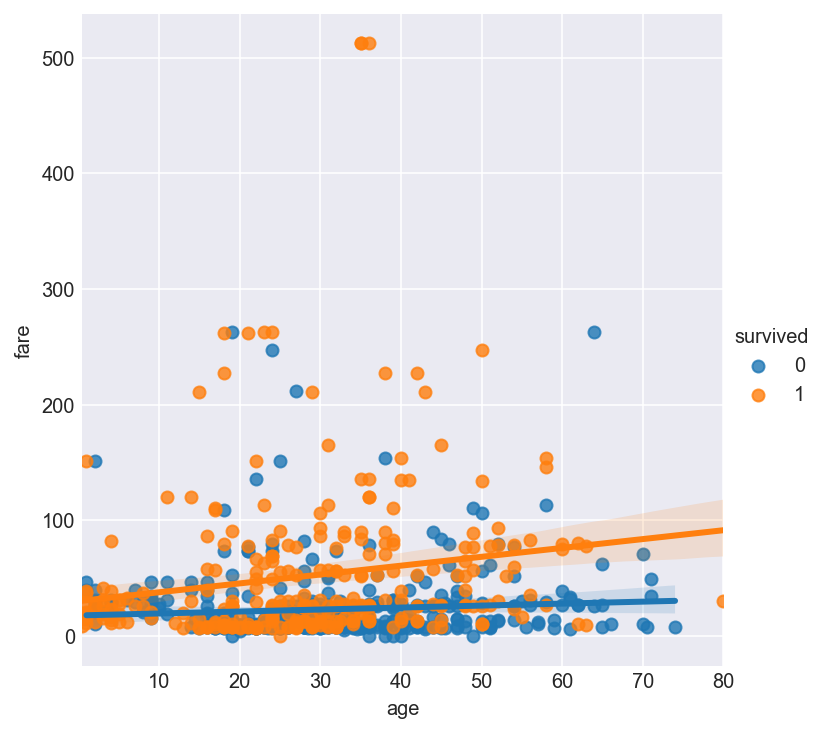

In [5]:
sns.lmplot(data=tdf, x='age' ,y='fare', hue='survived')

In [6]:
tdf['fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [7]:
tdf['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [8]:
tdf['age'].isnull().sum()

177

In [9]:
#tdf['age'] median

In [10]:
grouped_by_age = tdf.groupby('pclass')['age']

In [11]:
grouped_by_age.mean().round(2)

pclass
1    38.23
2    29.88
3    25.14
Name: age, dtype: float64

In [12]:
type(grouped_by_age)

pandas.core.groupby.generic.SeriesGroupBy

In [13]:
first_age_g = grouped_by_age.get_group(1)
second_age_g = grouped_by_age.get_group(2)
third_age_g = grouped_by_age.get_group(3)

In [65]:
# first_age_g.describe()
# second_age_g.describe()
third_age_g.describe()

count    355.000000
mean      25.140620
std       12.495398
min        0.420000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: age, dtype: float64

In [15]:
import random
first_range=(27.00,49.00)
second_range=(23.00,36.00)
third_range=(18.00,32.00)

In [16]:
[index for index, row in tdf[['age']].iterrows() if row.isnull().any()]

[5,
 17,
 19,
 26,
 28,
 29,
 31,
 32,
 36,
 42,
 45,
 46,
 47,
 48,
 55,
 64,
 65,
 76,
 77,
 82,
 87,
 95,
 101,
 107,
 109,
 121,
 126,
 128,
 140,
 154,
 158,
 159,
 166,
 168,
 176,
 180,
 181,
 185,
 186,
 196,
 198,
 201,
 214,
 223,
 229,
 235,
 240,
 241,
 250,
 256,
 260,
 264,
 270,
 274,
 277,
 284,
 295,
 298,
 300,
 301,
 303,
 304,
 306,
 324,
 330,
 334,
 335,
 347,
 351,
 354,
 358,
 359,
 364,
 367,
 368,
 375,
 384,
 388,
 409,
 410,
 411,
 413,
 415,
 420,
 425,
 428,
 431,
 444,
 451,
 454,
 457,
 459,
 464,
 466,
 468,
 470,
 475,
 481,
 485,
 490,
 495,
 497,
 502,
 507,
 511,
 517,
 522,
 524,
 527,
 531,
 533,
 538,
 547,
 552,
 557,
 560,
 563,
 564,
 568,
 573,
 578,
 584,
 589,
 593,
 596,
 598,
 601,
 602,
 611,
 612,
 613,
 629,
 633,
 639,
 643,
 648,
 650,
 653,
 656,
 667,
 669,
 674,
 680,
 692,
 697,
 709,
 711,
 718,
 727,
 732,
 738,
 739,
 740,
 760,
 766,
 768,
 773,
 776,
 778,
 783,
 790,
 792,
 793,
 815,
 825,
 826,
 828,
 832,
 837,
 839,
 84

In [17]:
tdf_null_age = tdf[tdf['age'].isnull()==1]

In [18]:
tdf_null_age_grouped = tdf_null_age.groupby('pclass')[['age']]
age_first = tdf_null_age_grouped.get_group(1)
age_second = tdf_null_age_grouped.get_group(2)
age_third = tdf_null_age_grouped.get_group(3)

In [19]:
age_first['age'] = age_first['age'].apply(lambda x : np.random.randint(27.00,49.00))
age_second['age'] = age_second['age'].apply(lambda x : np.random.randint(23.00,36.00))
age_third['age'] = age_third['age'].apply(lambda x : np.random.randint(18.00,32.00))

<ipython-input-19-e1963bb05638>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_first['age'] = age_first['age'].apply(lambda x : np.random.randint(27.00,49.00))
<ipython-input-19-e1963bb05638>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_second['age'] = age_second['age'].apply(lambda x : np.random.randint(23.00,36.00))
<ipython-input-19-e1963bb05638>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [20]:
nonull_age = pd.concat([age_first,age_second,age_third])

In [23]:
nonull_age['age'].describe()

count    177.000000
mean      27.022599
std        6.535702
min       18.000000
25%       22.000000
50%       27.000000
75%       30.000000
max       48.000000
Name: age, dtype: float64

In [24]:
tdf['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [26]:
tdf['age'] = tdf['age'].fillna(nonull_age['age'])

In [31]:
tdf['age'].isnull().sum()

0

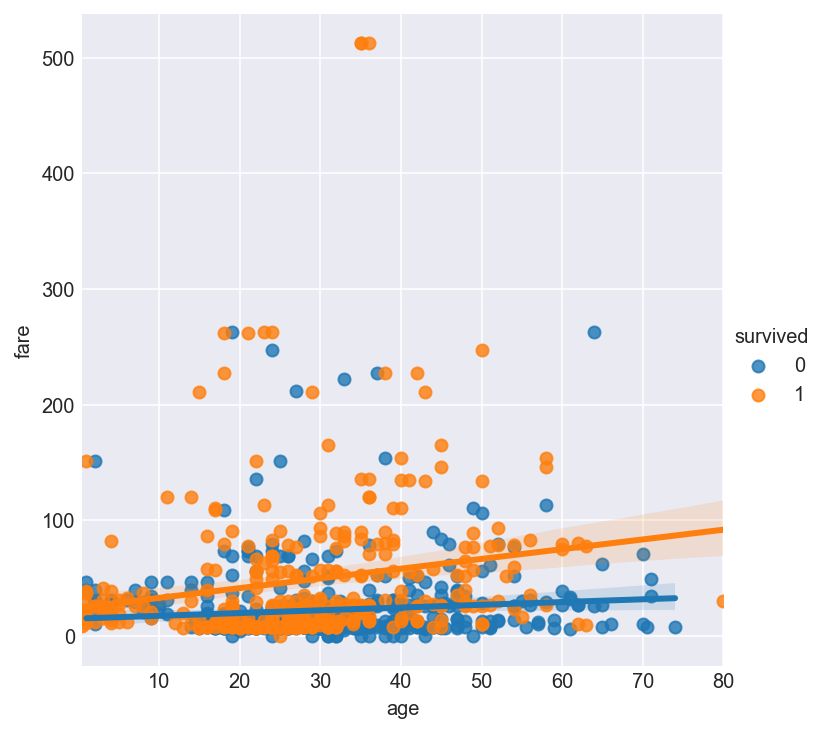

In [29]:
sns.lmplot(data=tdf, x='age' ,y='fare', hue='survived')

<AxesSubplot:xlabel='class', ylabel='age'>

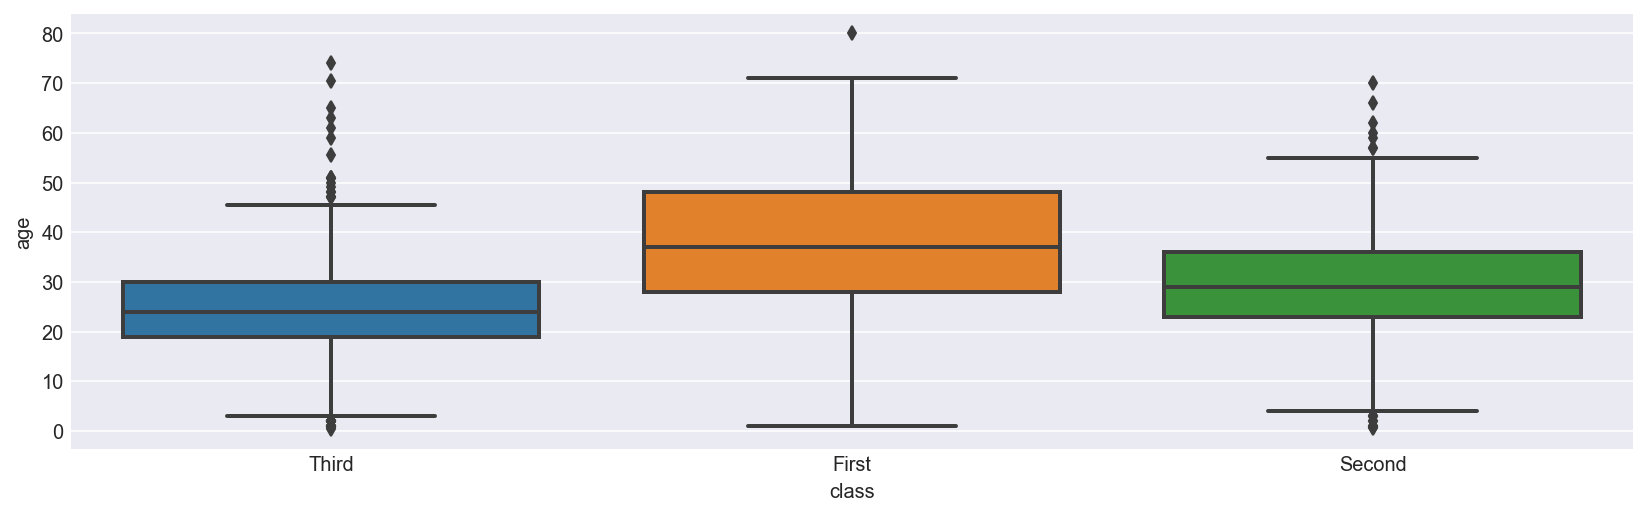

In [33]:
sns.boxplot(data=tdf, x='class',y='age')

In [58]:
tdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,22.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [41]:
grouped_class = tdf.groupby('pclass')

In [47]:
grouped_class.count()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
pclass,,,,,,,,,,,,,,
1,216,216,216,216,216,216,214,216,216,216,175,214,216,216
2,184,184,184,184,184,184,184,184,184,184,16,184,184,184
3,491,491,491,491,491,491,491,491,491,491,12,491,491,491


In [49]:
third_part = grouped_class.get_group(3)

In [61]:
third_part.groupby('alone')[['sibsp','parch']].count()

,sibsp,parch
alone,,
False,167,167
True,324,324
